In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_csv("Flight.csv")
df.head()

,Unnamed: 0,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Go First,22/02/2022,Goa,Ahmedabad,23:55,06:40,1 stop via Mumbai,"₹ 5,315"
2,1,Go First,22/02/2022,Goa,Ahmedabad,23:45,07:30,1 stop via New Delhi,"₹ 5,315"
3,2,IndiGo,22/02/2022,Goa,Ahmedabad,23:25,01:00,Non stop,"₹ 5,316"
4,3,IndiGo,22/02/2022,Goa,Ahmedabad,21:45,05:00,1 stop via Bengaluru,"₹ 5,316"


In [3]:
df.shape

(5301, 9)

There is 5301 rows and 9 columns

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Go First,22/02/2022,Goa,Ahmedabad,23:55,06:40,1 stop via Mumbai,"₹ 5,315"
2,Go First,22/02/2022,Goa,Ahmedabad,23:45,07:30,1 stop via New Delhi,"₹ 5,315"
3,IndiGo,22/02/2022,Goa,Ahmedabad,23:25,01:00,Non stop,"₹ 5,316"
4,IndiGo,22/02/2022,Goa,Ahmedabad,21:45,05:00,1 stop via Bengaluru,"₹ 5,316"
...,...,...,...,...,...,...,...,...
5296,Vistara,28/02/2022,New Delhi,Mumbai,17:40,23:00,1 stop via Hyderabad,"₹ 11,415"
5297,IndiGo,28/02/2022,New Delhi,Mumbai,05:15,10:05,1 stop via Ahmedabad,"₹ 11,573"
5298,IndiGo,28/02/2022,New Delhi,Mumbai,18:00,22:25,1 stop via Indore,"₹ 11,730"
5299,IndiGo,28/02/2022,New Delhi,Mumbai,14:05,17:55,1 stop via Indore,"₹ 11,814"


In [5]:
df=df.drop([df.index[0]])
df

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
1,Go First,22/02/2022,Goa,Ahmedabad,23:55,06:40,1 stop via Mumbai,"₹ 5,315"
2,Go First,22/02/2022,Goa,Ahmedabad,23:45,07:30,1 stop via New Delhi,"₹ 5,315"
3,IndiGo,22/02/2022,Goa,Ahmedabad,23:25,01:00,Non stop,"₹ 5,316"
4,IndiGo,22/02/2022,Goa,Ahmedabad,21:45,05:00,1 stop via Bengaluru,"₹ 5,316"
5,SpiceJet,22/02/2022,Goa,Ahmedabad,21:05,23:15,Non stop,"₹ 5,421"
...,...,...,...,...,...,...,...,...
5296,Vistara,28/02/2022,New Delhi,Mumbai,17:40,23:00,1 stop via Hyderabad,"₹ 11,415"
5297,IndiGo,28/02/2022,New Delhi,Mumbai,05:15,10:05,1 stop via Ahmedabad,"₹ 11,573"
5298,IndiGo,28/02/2022,New Delhi,Mumbai,18:00,22:25,1 stop via Indore,"₹ 11,730"
5299,IndiGo,28/02/2022,New Delhi,Mumbai,14:05,17:55,1 stop via Indore,"₹ 11,814"


Since first row is Nan we can drop it

In [6]:
df.columns

Index(['Airline', 'Journey_date', 'From', 'To', 'Dtime', 'Atime', 'Stops',
       'Price'],
      dtype='object')

Here we can see the name of the columns

In [7]:
df.dtypes

Airline         object
Journey_date    object
From            object
To              object
Dtime           object
Atime           object
Stops           object
Price           object
dtype: object

Here we can see all are object type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5300 entries, 1 to 5300
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       5300 non-null   object
 1   Journey_date  5300 non-null   object
 2   From          5300 non-null   object
 3   To            5300 non-null   object
 4   Dtime         5300 non-null   object
 5   Atime         5300 non-null   object
 6   Stops         5300 non-null   object
 7   Price         5300 non-null   object
dtypes: object(8)
memory usage: 372.7+ KB


Here we can see that we dont have any null values and also we can see data types and how much memorey is used

In [9]:
#Grouping Stops column 
df["Stops"].replace(("1 stop via Mumbai","1 stop via Hubli","1 stop via Shirdi","1 stop via Hubli ","1 stop via Kozhikode","1 stop via Hubli ","1 stop via Belgaum","1 stop via Jabalpur","stop via Kozhikode","1 stop via Raipur","1 stop via Hyderabad","1 stop via Bengaluru","1 stop via New Delhi","1 stop via Ahmedabad","1 stop via Goa","1 stop via Pune","1 stop via Lucknow","1 stop via Ranchi","1 stop via Kolkata","1 stop via Chennai","1 stop via Chandigarh","1 stop via Kochi","1 stop via Jaipur","1 stop via Nagpur","1 stop via Amritsar","1 stop via Patna","1 stop via Surat","1 stop via Guwahati","1 stop via Vadodara","1 stop via Udaipur","1 stop via Indore","1 stop via Bhavnagar","1 stop via Madurai","1 stop via Bagdogra","1 stop via Varanasi","1 stop via Srinagar","1 stop via Mangalore","1 stop via Jammu","1 stop via Vijayawada","1 stop via Jodhpur","1 stop via Kalaburagi","1 stop via Aurangabad","1 stop via Rajkot","1 stop via Mysore","1 stop via Bhopal","1 stop via Tirupati","1 stop via Dehradun","1 stop via Visakhapatnam"),"1 Stop",inplace=True)
#Grouping Stops column
df["Stops"].replace(("2 stop via New Delhi,Hyderabad","2 stop via Hyderabad,New Delhi","2 stop via New Delhi,Bengaluru",
"2 stop via Hyderabad,Visakhapatnam","2 stop via Kolkata,Mumbai","2 stop via Hyderabad,Aurangabad","2 stop via New Delhi,Kolkata","2 stop via Hyderabad,Jaipur"
"2 stop via New Delhi,Jaipur","stop via Chennai,New Delhi","2 stop via Aurangabad,Mumbai","2 stop via Ranchi,Chennai",                     
"2 stop via Ahmedabad,New Delhi","2 stop via Guwahati,Chennai","2 stop via Hyderabad,Vijayawada","2 stop via Lucknow,New Delhi","2 stop via Hyderabad,Kolhapur","2 stop via Indore,New Delhi","2 stop via Jaipur,Mumbai",
"2 stop via Nagpur,New Delhi","2 stop via Mumbai,Bengaluru ","2 stop via Nagpur,Raipur","2 stop via New Delhi,Bhopal",
"2 stop via Bengaluru,New Delhi","2 stop via Mumbai,Bengaluru","2 stop via New Delhi,Jaipur","2 stop via Hyderabad,Jaipur","2 stop via Bhubaneswar,Kolkata","2 stop via New Delhi,Goa","2 stop via Chennai,New Delhi","2 stop via Visakhapatnam,Hyderabad","2 stop via Mumbai,Jaipur","2 stop via Goa,Mumbai","2 stop via Bengaluru,Mumbai","2 stop via Nasik,Pune","2 stop via New Delhi,Goa ","2 stop via Mumbai,Hyderabad","2 stop via Mumbai,New Delhi","2 stop via Hyderabad,Mumbai","2 stop via Bengaluru,Hyderabad","2 stop via Hyderabad,Bengaluru","2 stop via New Delhi,Mumbai","2 stop via Varanasi,Bengaluru","2 stop via New Delhi,Chandigarh","2 stop via Chandigarh,New Delhi","2 stop via Chandigarh,Ahmedabad","2 stop via Ranchi,New Delhi","2 stop via Ranchi,Bengaluru","2 stop via Ahmedabad,Chandigarh","2 stop via Chandigarh,Srinagar","2 stop via Bengaluru,Ranchi","2 stop via Jammu,Srinagar","2 stop via Kochi,Mumbai","2 stop via New Delhi,Varanasi","2 stop via Hyderabad,Mysore","2 stop via Mumbai,Ranchi","2 stop via Chennai,Ranchi","2 stop via Hyderabad,Pune","2 stop via Nagpur,Pune","2 stop via Chennai,Hyderabad","2 stop via Pune,Hyderabad","2 stop via Hyderabad,Nanded","2 stop via Vijayawada,Hyderabad","2 stop via Hyderabad,Goa","2 stop via Nanded,Hyderabad","2 stop via Mumbai,Chandigarh","2 stop via Belgaum,Hyderabad","2 stop via Chennai,Jaipur","2 stop via Hyderabad,Chennai","2 stop via Hyderabad,Tirupati","2 stop via Srinagar,Chandigarh","2 stop via Mangalore,Mumbai","2 stop via Amritsar,Srinagar","2 stop via Goa,Hyderabad","2 stop via Mysore,Hyderabad"),"2 Stops",inplace=True)
#Grouping Stops column
df["Stops"].replace(("3 stop via Goa,New Delhi,Hyderabad","3 stop via Kolkata,Aizawl,Guwahati","3 stop via Aurangabad,New Delhi,Bengaluru","3 stop via Hyderabad,Mumbai,New Delhi","3 stop via New Delhi,Hyderabad,Mysore","3 stop via Mumbai,Aurangabad,New Delhi","3 stop via Chandigarh,New Delhi,Ranchi","3 stop via New Delhi,Aurangabad,Mumbai","3 stop via Leh,Jammu,Srinagar","3 stop via Bhubaneswar,New Delhi,Hyderabad","3 stop via Hyderabad,New Delhi,Mumbai","3 stop via Indore,Hyderabad,Mumbai","3 stop via Hyderabad,New Delhi,Jaipur","3 stop via Hyderabad,New Delhi,Goa","3 stop via Ahmedabad,New Delhi,Hyderabad","3 stop via Belgaum,Hyderabad,Mumbai","3 stop via Hyderabad,New Delhi,Bhopal","3 stop via Mumbai,New Delhi,Hyderabad"),"3 Stops",inplace=True)
#Grouping Stops column
df["Stops"].replace(("4 stop via Bhubaneswar,Surat,New Delhi,Hyderabad"),"4 Stops",inplace=True)

In [10]:
df.replace({"Non stop": 0,"1 Stop": 1,"2 Stops": 2,"3 Stops": 3,"4 Stops": 4},inplace = True)

In [11]:
df.Stops.value_counts()

1    2791
0    2256
2     233
3      20
Name: Stops, dtype: int64

In [12]:
#Grouping Airlines column for multiple airlines
df["Airline"].replace(("Spicejet, IndiGo","Air India, IndiGo","Spicejet, AirAsia","IndiGo, Air India","IndiGo, Spicejet","AirAsia, IndiGo","IndiGo, Go First","IndiGo, TruJet","Vistara, IndiGo","Spicejet, Air India","Air India, Go First","Vistara, Spicejet","Spicejet, Go First","Go First, IndiGo","IndiGo, AirAsia","Air India, AirAsia","Vistara, Go First","TruJet, IndiGo","Spicejet, Vistara","IndiGo, Vistara","Air India, Spicejet","AirAsia, Go First","Vistara, AirAsia","Vistara, Air India","Go First, AirAsia","Spicejet, TruJet","Vistara, TruJet","AirAsia, TruJet","Go First, Air India","Go First, Spicejet","Air India, Vistara"),"Multiple Airlines",inplace=True)

In [13]:
#Checking the value counts of Airline column
df.Airline.value_counts()

IndiGo                 1876
Go First                874
Vistara                 786
AirAsia                 640
Air India               591
SpiceJet                328
Multiple Airlines       125
SpiceJet, IndiGo         29
SpiceJet, AirAsia        14
SpiceJet, Air India      11
SpiceJet, Vistara         9
SpiceJet, Go First        5
Star Air, IndiGo          3
Star Air                  3
Air India, SpiceJet       2
IndiGo, Star Air          1
IndiGo, SpiceJet          1
Go First, SpiceJet        1
Vistara, SpiceJet         1
Name: Airline, dtype: int64

In [14]:
print("Empty cells in Dataset is ",df.isna().values.any())
print("\nColumnwise Empty cell analysis\n")
print(df.isna().sum())

Empty cells in Dataset is  False

Columnwise Empty cell analysis

Airline         0
Journey_date    0
From            0
To              0
Dtime           0
Atime           0
Stops           0
Price           0
dtype: int64


Here we can see that there is no null value

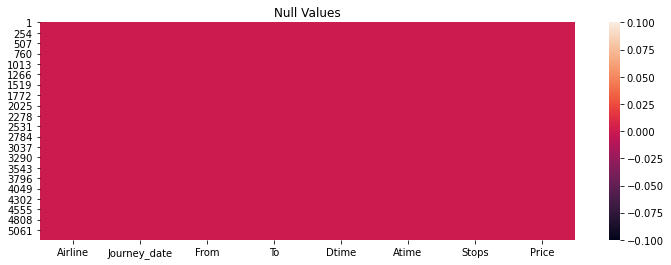

In [15]:
plt.figure(figsize=[12,4])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Using heatmap we can see that there is no null value

In [16]:
df['Journey_date'] =  pd.to_datetime(df['Journey_date'])

In [17]:
#Extracting year
df["Journey_year"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.year
#Extracting month
df["Journey_mon"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.month
#Extracting day
df["Journey_day"]=pd.to_datetime(df.Journey_date, format="%Y/%m/%d").dt.day

In [18]:
df.Journey_year.value_counts()

2022    5300
Name: Journey_year, dtype: int64

In [19]:
df = df.drop(["Journey_year"],axis=1)

In [20]:
df = df.drop(["Journey_mon"],axis=1)
df = df.drop(["Journey_date"],axis=1)

In [21]:
df['Dtime'] =  pd.to_datetime(df['Dtime'])
df['Atime'] =  pd.to_datetime(df['Atime'])

In [22]:
#Extracting Hours
df["Dhour"]=pd.to_datetime(df["Dtime"]).dt.hour

#Extracting Hours
df["DMin"]=pd.to_datetime(df["Dtime"]).dt.minute

In [23]:
df = df.drop(["Dtime"],axis=1)

In [24]:
df["AHour"]=pd.to_datetime(df["Atime"]).dt.hour

#Extracting Hours
df["AMin"]=pd.to_datetime(df["Atime"]).dt.minute
#Droping Arrival_Time column after extraction
df = df.drop(["Atime"],axis=1)

In [25]:
df.dtypes

Airline        object
From           object
To             object
Stops           int64
Price          object
Journey_day     int64
Dhour           int64
DMin            int64
AHour           int64
AMin            int64
dtype: object

In [26]:
df.describe()

,Stops,Journey_day,Dhour,DMin,AHour,AMin
count,5300.000000,5300.000000,5300.000000,5300.00000,5300.000000,5300.000000
mean,0.625849,25.326226,13.775660,25.84717,14.123585,27.835849
std,0.587191,1.890719,5.887578,18.06943,7.023618,17.487910
min,0.000000,22.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,24.000000,8.000000,10.00000,8.000000,13.750000
50%,1.000000,25.000000,15.000000,25.00000,15.000000,30.000000
75%,1.000000,27.000000,19.000000,40.00000,20.000000,45.000000
max,3.000000,28.000000,23.000000,55.00000,23.000000,55.000000


In [27]:
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'From', 'To', 'Price']


Here we can see that we have 5 value which is categorical

In [28]:
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Stops', 'Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']


Here we can see that we have 5 value which is numerical

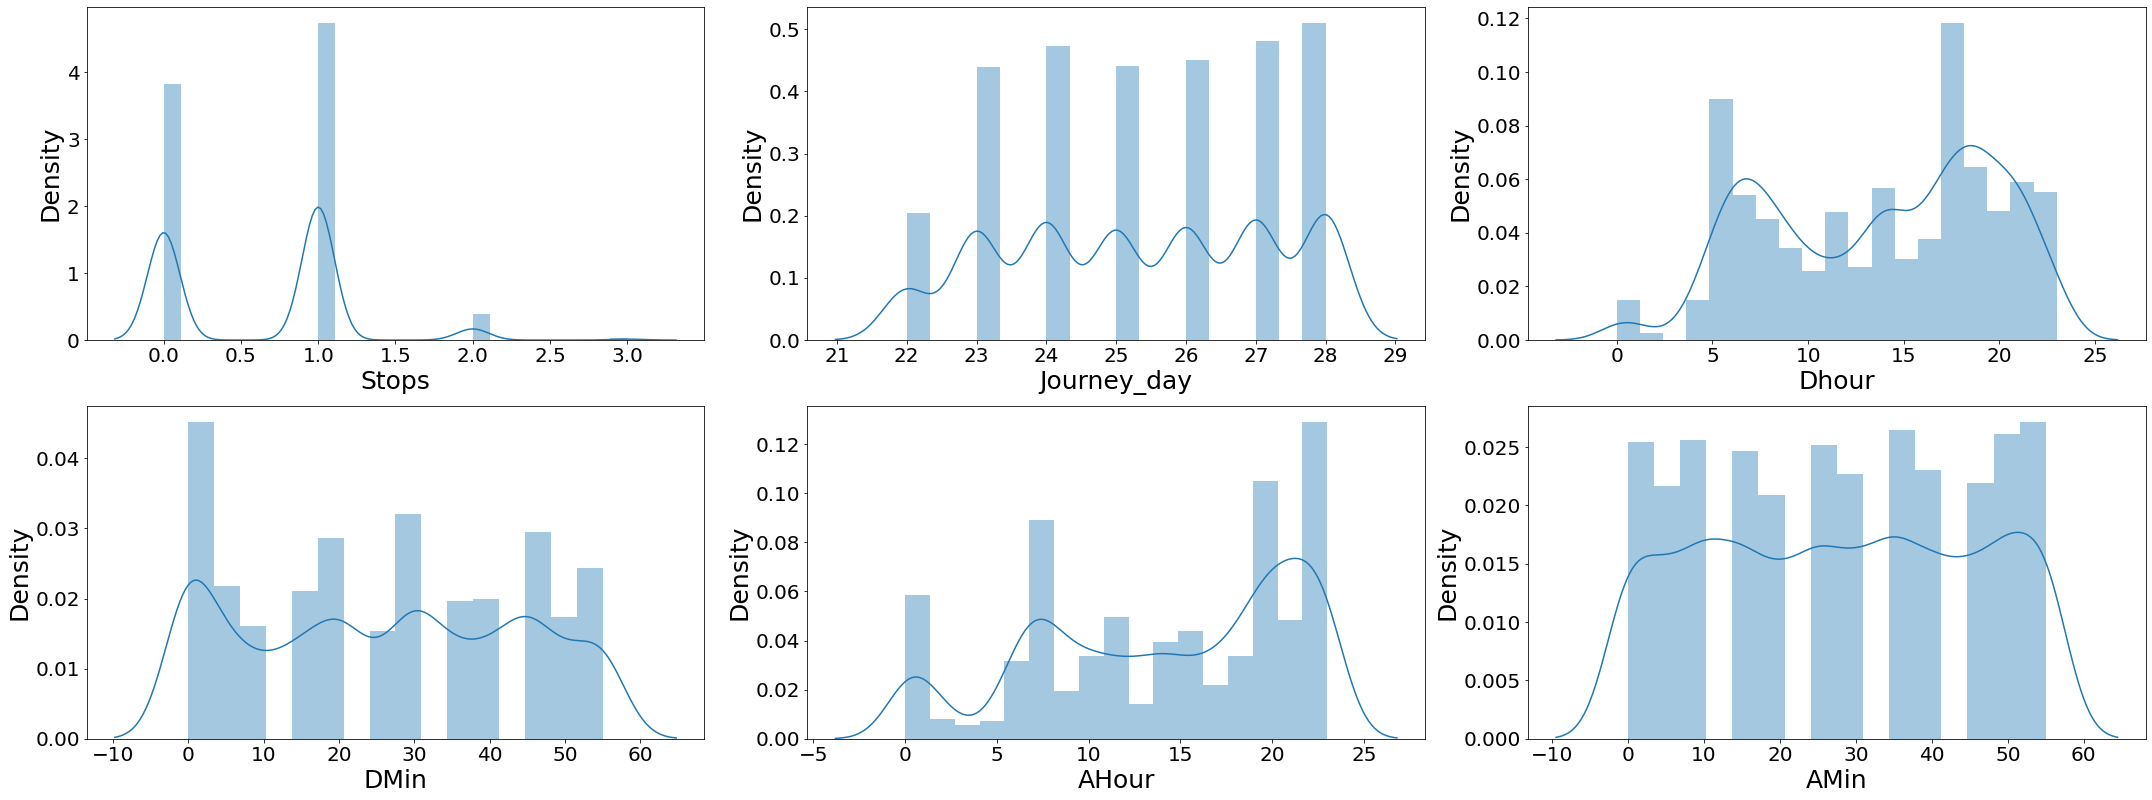

In [29]:
plt.figure(figsize = (30,16))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Density',fontsize = 25)
        plt.xticks(fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

Here we can see that its not normally distributed and skewness is present 

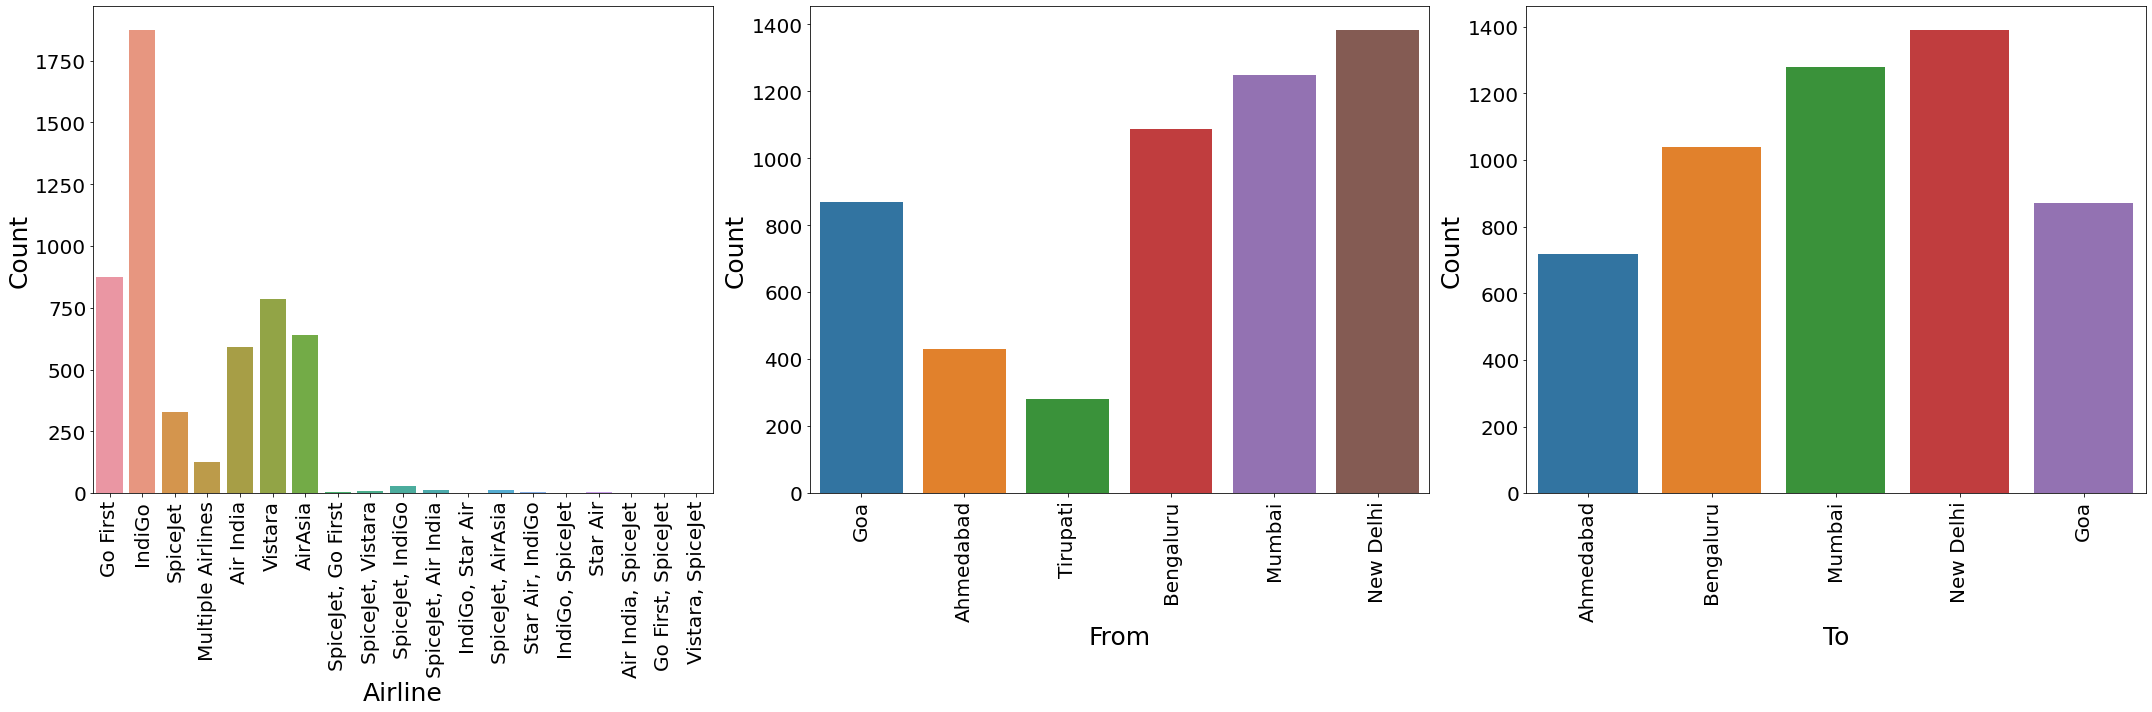

In [30]:
plt.figure(figsize = (30,10))
plotnumber = 1
for column in df[categorical_columns]:
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize = 25)
        plt.ylabel('Count',fontsize = 25)
        plt.xticks(rotation=90,fontsize=20)  
        plt.yticks(fontsize=20)
    plotnumber+=1
plt.tight_layout()

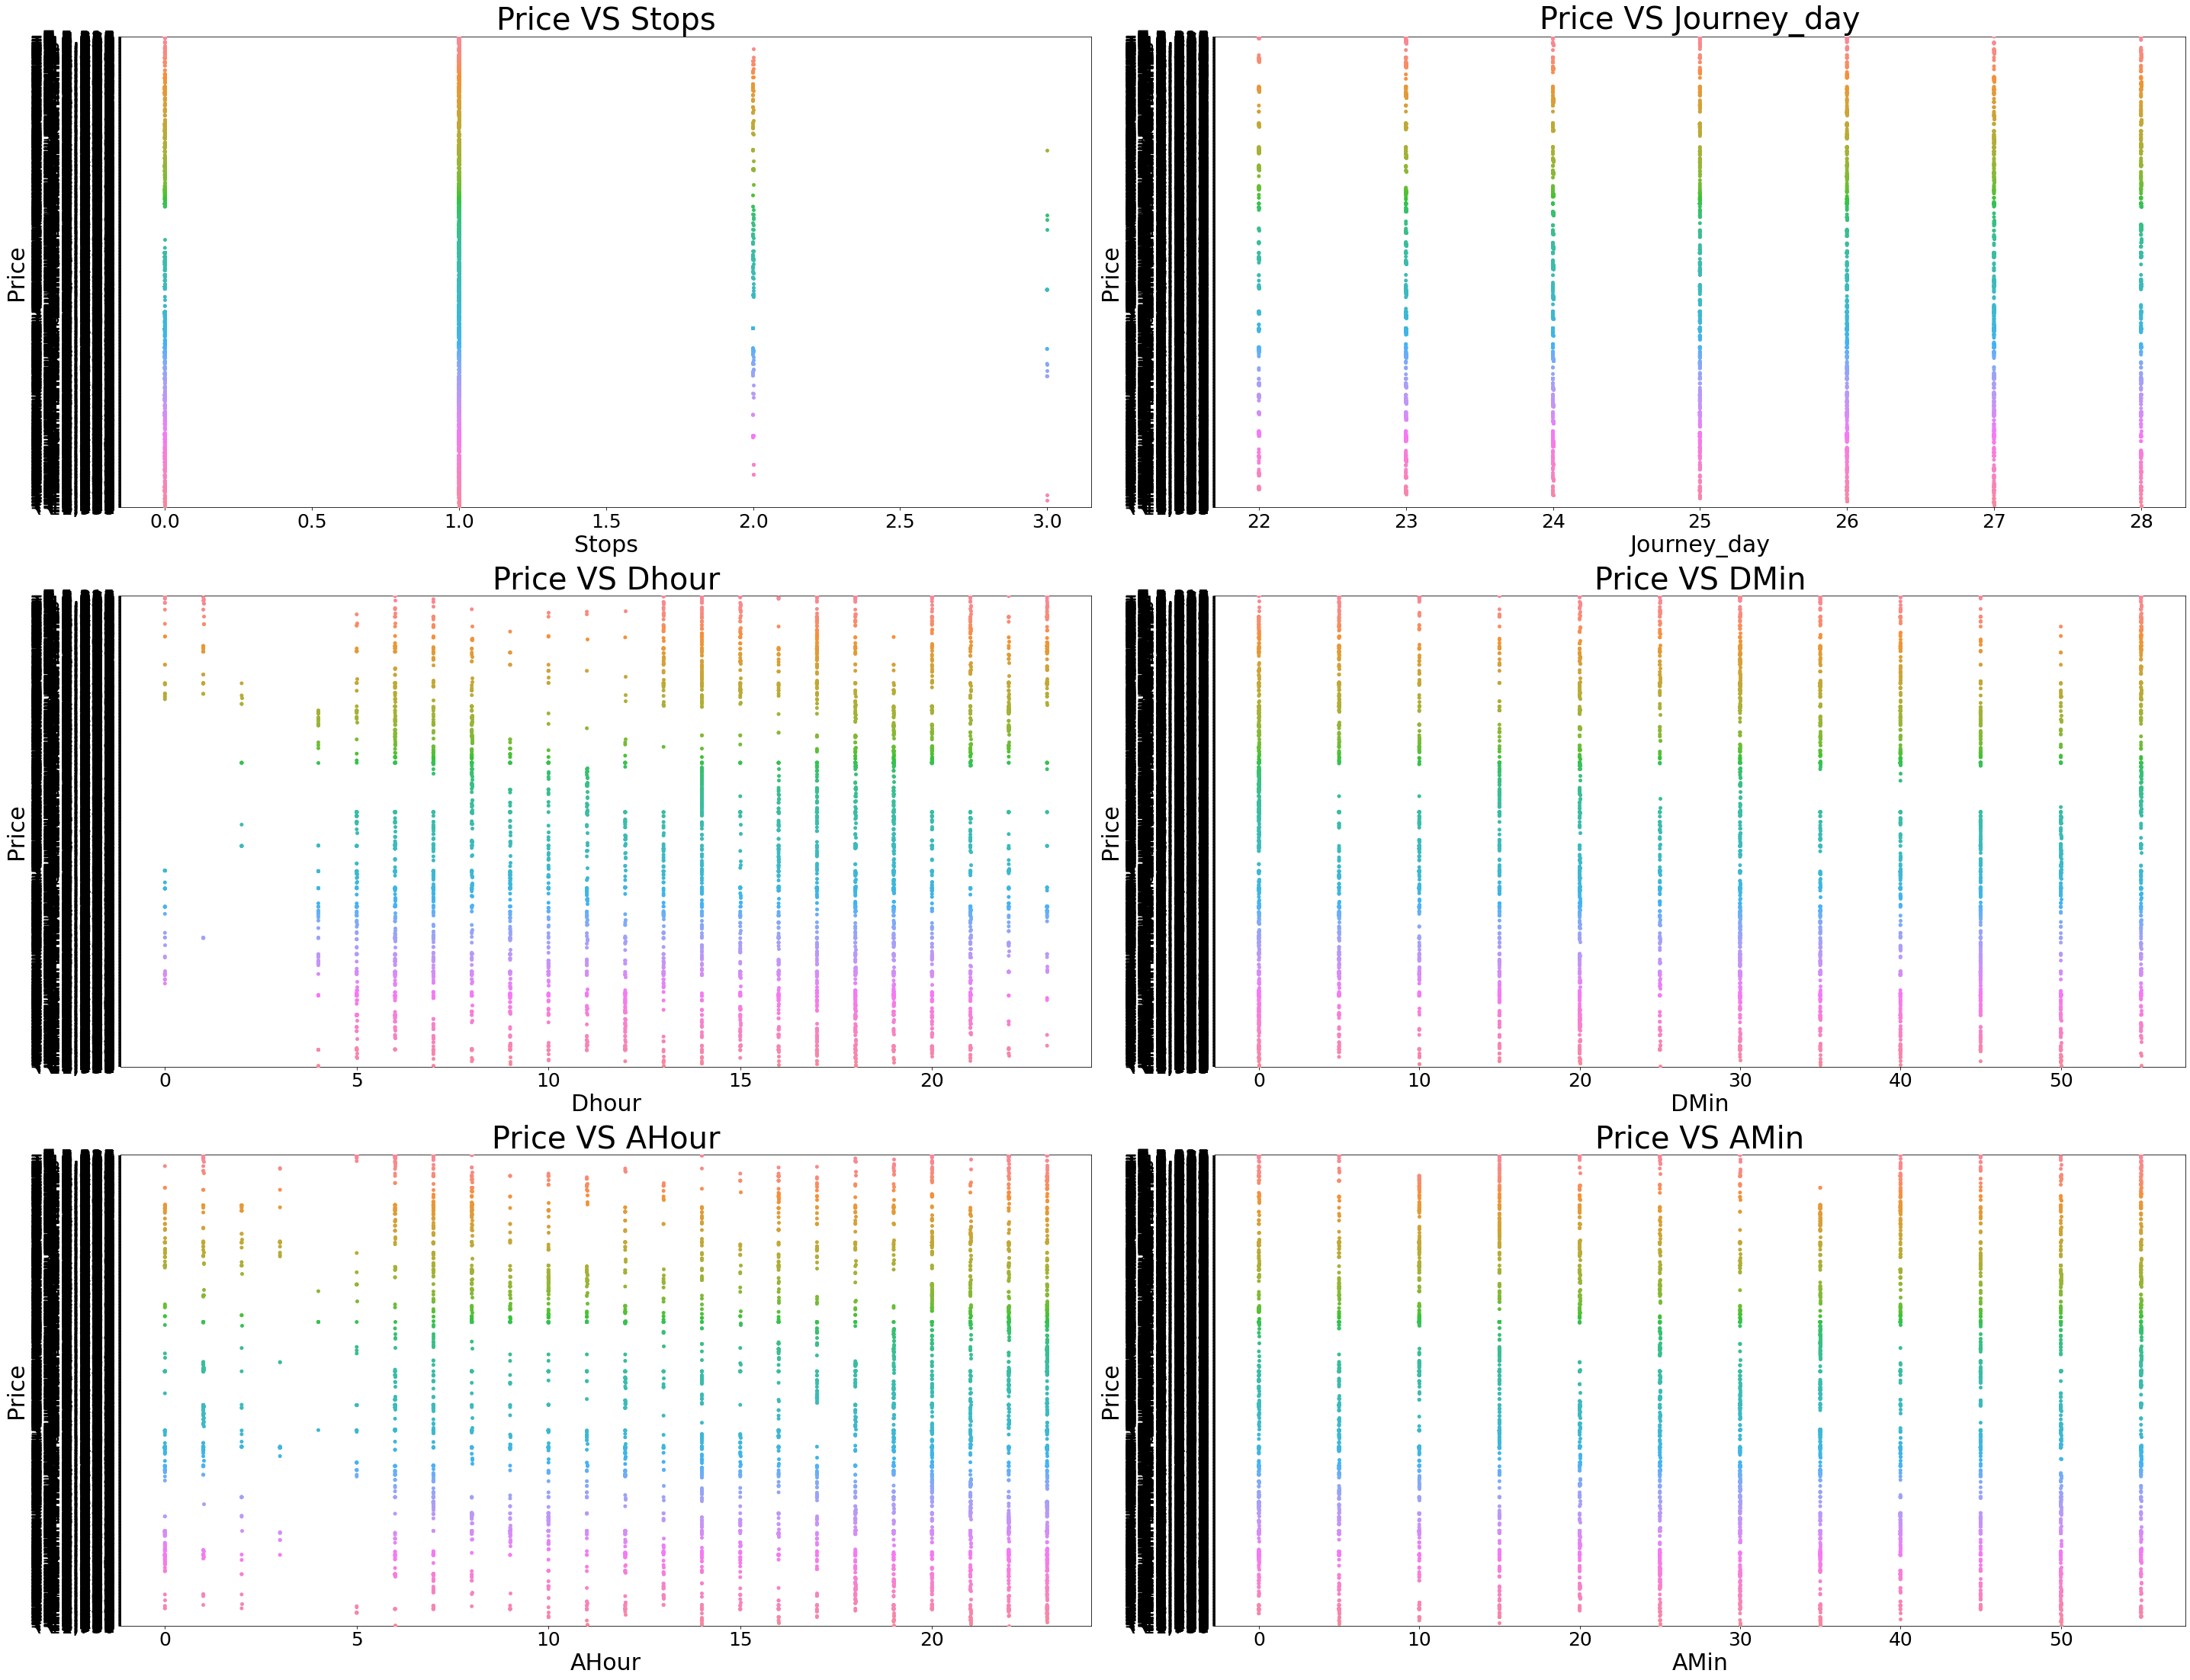

In [31]:
col=['Stops', 'Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']
#stripplot for numerical columns
plt.figure(figsize=(40,40))
for i in range(len(col)):
    plt.subplot(4,2,i+1)
    sns.stripplot(x=df[col[i]] , y=df['Price'])
    plt.title(f"Price VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=25)  
    plt.yticks(fontsize=25)
    plt.xlabel(col[i],fontsize = 30)
    plt.ylabel('Price',fontsize = 30)
    plt.tight_layout()

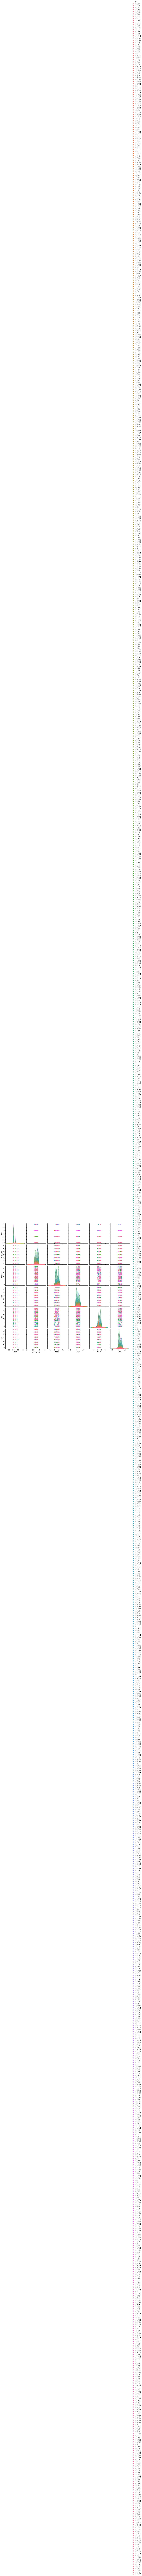

In [32]:
#pair ploting for df
sns.pairplot(df,hue="Price")

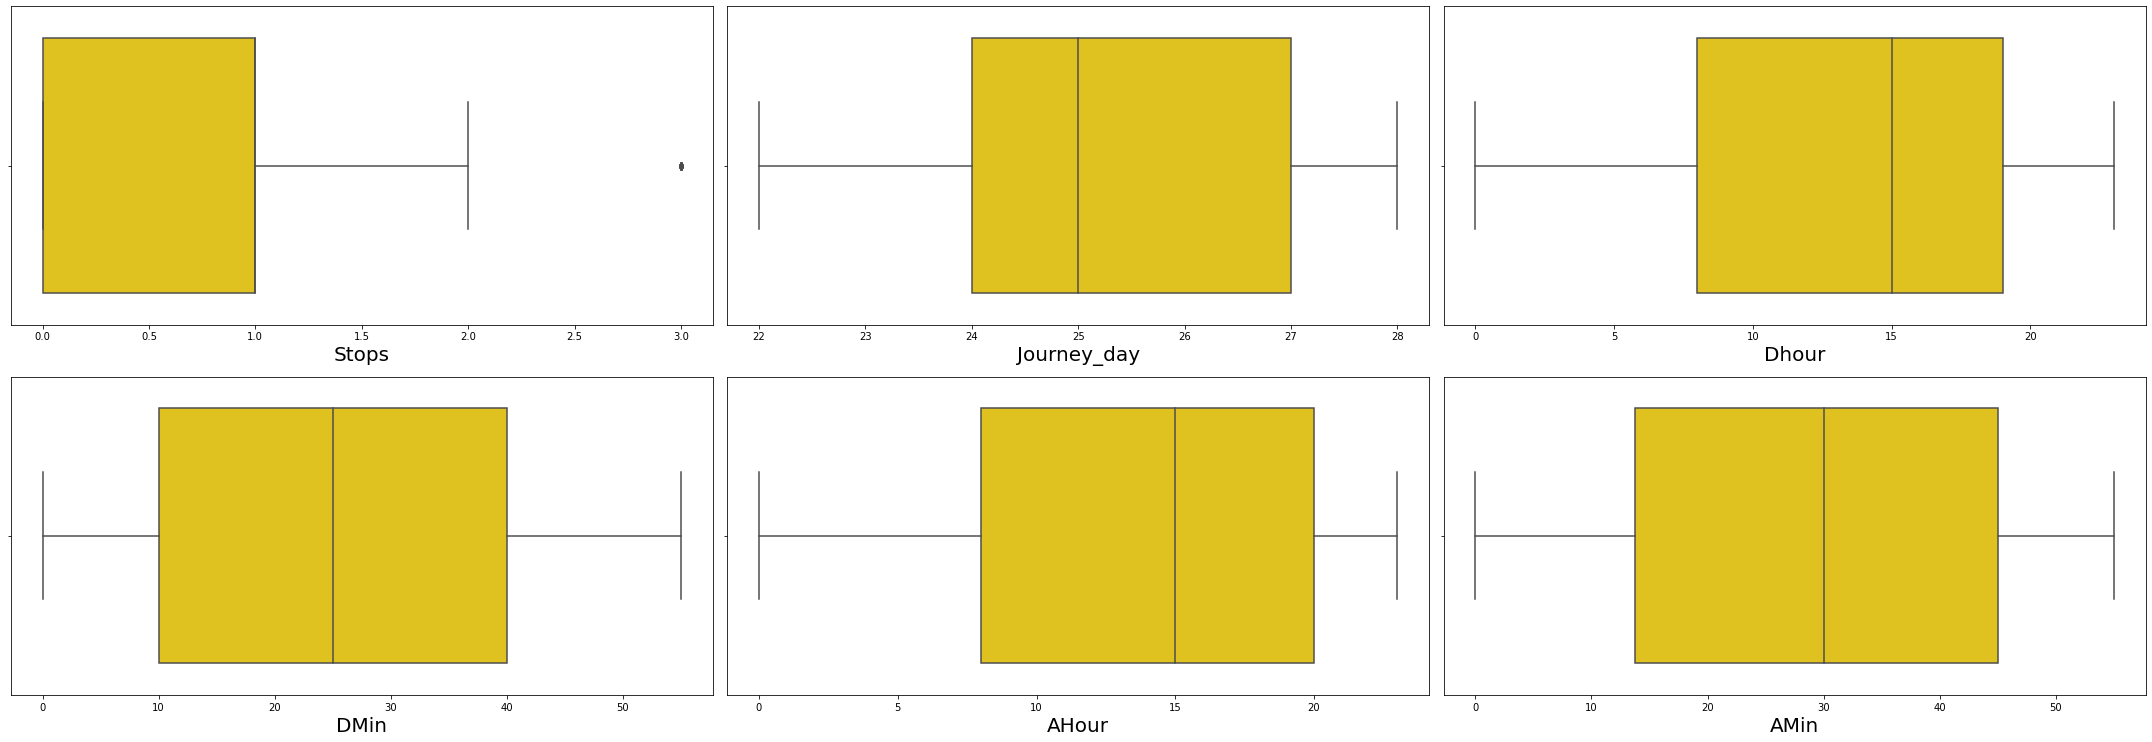

In [33]:
plt.figure(figsize=(30,15),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [34]:
df.skew()

Stops          0.433955
Journey_day   -0.100778
Dhour         -0.281045
DMin           0.030874
AHour         -0.442867
AMin          -0.015461
dtype: float64

In [35]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'From', 'To', 'Price']


In [36]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[cat_col]= df[cat_col].apply(LE.fit_transform)

In [37]:
df.head()

,Airline,From,To,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
1,3,2,0,1,868,22,23,55,6,40
2,3,2,0,1,868,22,23,45,7,30
3,5,2,0,0,869,22,23,25,1,0
4,5,2,0,1,869,22,21,45,5,0
5,9,2,0,0,877,22,21,5,23,15


In [38]:
cor=df.corr()

In [39]:
cor

,Airline,From,To,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
Airline,1.000000,0.088805,0.029748,-0.132243,-0.102584,-0.020645,-0.014237,0.202625,0.066459,-0.026192
From,0.088805,1.000000,-0.171297,0.003115,0.008936,0.022927,-0.022153,-0.055018,0.116105,0.007246
To,0.029748,-0.171297,1.000000,-0.111503,0.108093,0.025309,-0.029787,-0.027714,-0.036485,-0.028908
Stops,-0.132243,0.003115,-0.111503,1.000000,-0.219539,-0.061039,-0.005506,-0.014141,0.000140,-0.013535
Price,-0.102584,0.008936,0.108093,-0.219539,1.000000,0.044036,-0.037128,-0.025992,-0.041086,-0.000974
Journey_day,-0.020645,0.022927,0.025309,-0.061039,0.044036,1.000000,-0.135201,-0.011875,0.002534,0.001209
Dhour,-0.014237,-0.022153,-0.029787,-0.005506,-0.037128,-0.135201,1.000000,0.051606,0.105305,0.000067
DMin,0.202625,-0.055018,-0.027714,-0.014141,-0.025992,-0.011875,0.051606,1.000000,-0.052951,-0.032657
AHour,0.066459,0.116105,-0.036485,0.000140,-0.041086,0.002534,0.105305,-0.052951,1.000000,-0.034926
AMin,-0.026192,0.007246,-0.028908,-0.013535,-0.000974,0.001209,0.000067,-0.032657,-0.034926,1.000000


<AxesSubplot:>

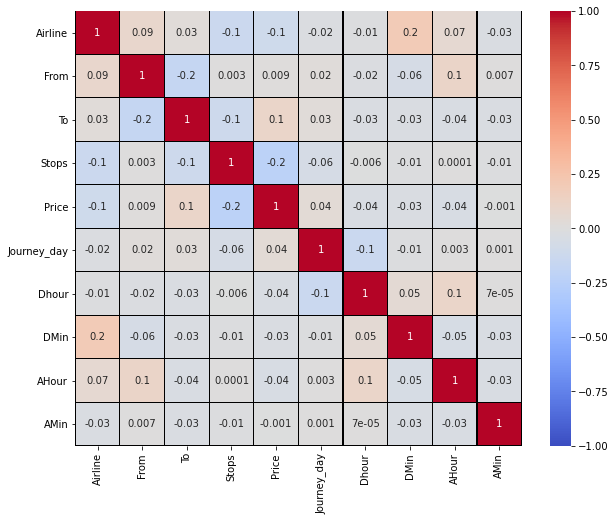

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")

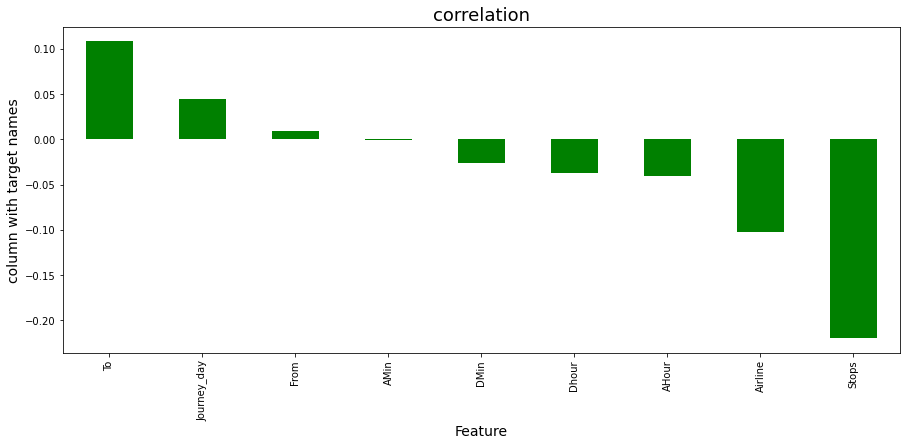

In [41]:
plt.figure(figsize=(15,6))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Here we can see that To is postive correlated and after that its decreasing drastically and at the end stops is negative correlated

In [42]:
x = df.drop("Price",axis=1)
y = df["Price"]

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# VIF

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.082532,Airline
1,1.059374,From
2,1.049670,To
3,1.034869,Stops
4,1.024866,Journey_day
5,1.036848,Dhour
6,1.060047,DMin
7,1.036053,AHour
8,1.004111,AMin


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.4325774736502308  on Random_state  193


In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

In [48]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

In [49]:
#RandomForestRegressor:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 42.76463487680048
mean_squared_error: 72743.65559290284
mean_absolute_error: 174.7212943246481
root_mean_squared_error: 269.71031792073296


In [52]:
#ExtraTreeRegressor:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.4163693803624481
mean_squared_error: 74176.90914874214
mean_absolute_error: 160.66223270440253
root_mean_squared_error: 272.35438154863994


In [53]:
#Gradient Boosting Regressor:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.27827851979907003
mean_squared_error: 91727.65592868756
mean_absolute_error: 227.3293027658348
root_mean_squared_error: 302.86573911336944


In [54]:
#DecisionTreeRegressor:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.0004953821875122166
mean_squared_error: 127032.68254716981
mean_absolute_error: 196.2632075471698
root_mean_squared_error: 356.41644539382554


In [55]:
#KNN:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.28879291889404846
mean_squared_error: 90391.3216100629
mean_absolute_error: 215.99446540880504
root_mean_squared_error: 300.65149527328634


By looking into the model r2_score and error i found ExtraTreesRegressor as the best model with highest r2_score and least errors.

# Hyper Parameter Tuning:

In [56]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV
parameter = {'max_features':['auto','sqrt','log2'],
             'min_samples_split':[1,2,3,4],
             'n_estimators':[20,40,60,80,100],
             'min_samples_leaf':[1,2,3,4,5],
              'n_jobs':[-2,-1,1,2]}

In [57]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

In [58]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'n_jobs': [-2, -1, 1, 2]})

In [59]:
GCV.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 80,
 'n_jobs': -2}

In [60]:
Best_mod=ExtraTreesRegressor(max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=80,n_jobs=1)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 45.79747896725033
mean_squared_error: 68889.04288085377
mean_absolute_error: 166.93343135760117
RMSE value: 262.46722248854957


# Saving the model:

In [61]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Flight_Price.pkl")

['Flight_Price.pkl']

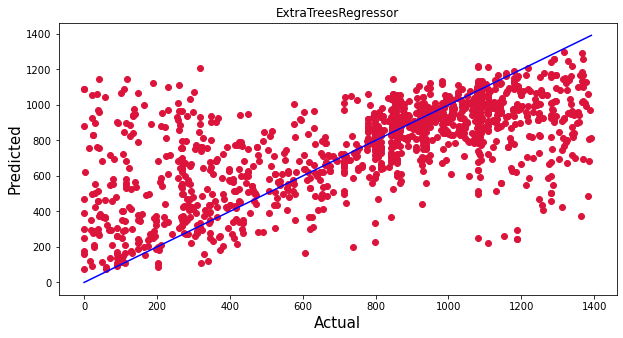

In [66]:
#prediction
prediction = Best_mod.predict(X_test)
prediction
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.